## 다중회귀(Multiple Regression)
- 여러 개의 특성(독립변수=항목=컬럼=변수=퓨처)을 사용한 선형회귀
- 특성이 많을수록 복잡도 증가
- 1개의 특성으로는 선형회귀모델이 '직선'을 학습한다면
- 2개이상의 특성으로는 선형회귀모델이 '평면'을 학습하게 된다.

### 다중회귀모델 공식(방정식)
- y = a*특성1 + b*특성2 + c*특성3 ... + y절편

### 데이터 준비하기

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/03_농어의_길이_높이_두께_데이터.csv')
df

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [4]:
len(df)

56

### 사용할 데이터
- 훈련데이터(독립변수) : 길이(length), 높이(height), 두께(width)
- target데이터(종속변수) : 무게
- 새로 추가할 데이터 : 면적(길이*높이)
- 모든 작업은 사이킷런에서 제공하는 함수 이용

#### 특성공학
- 기존의 특성을 이용해서, '새로운특성(항목)'을 만들어내는 작업

In [5]:
## 데이터프레임을 2차원 배열로 바꾸기
# 데이터프레임은 2차원
# to_numpy() : 2차원 배열로 변경
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [6]:
import numpy as np
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

len(perch_weight)

56

In [7]:
## 훈련데이터와 테스트데이터 분리
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

In [9]:
print(train_data.shape)
print(train_target.shape)
print(test_data.shape)
print(test_target.shape)

(42, 3)
(42,)
(14, 3)
(14,)


### 특성 만들기 : 사이킷런의 변환기
- 사이킷런은 특성을 만들거나 전처리하기 위한 다양한 객체를 제공
- 사이킷런에서 제공하는 이런 클래스들을 '변환기'라고 부릅니다

#### < 특성 생성 패키지 >
- 사용되는 패키지 : sklearn.preprocessing
-  사용되는 클래스 : PolynomialFeatures
- 사용되는 함수 : fit(), transform(), fit_transforms()
- 특성 생성 시 사용하는 데이터는 train_data, test_data 
- 훈련에 영향을 미치는 특성(항목)을 스스로 찾아서 생성하는 것이 목적이므로
- target 데이터는 해당사항 없음(정답은 변경하면 안된다)

In [10]:
from sklearn.preprocessing import PolynomialFeatures   # 사이킷런 변환기 클래스

In [13]:
### sample(샘플)
## 객체생성(모델)
poly = PolynomialFeatures(include_bias=False)

## 임의값 사용
temp_data = [[2,3]]

## 훈련시키기 : 새롭게 만들 특성 조합 스스로 찾기
poly.fit(temp_data)

## 찾은 특성 조합으로 데이터 변환하기
print(poly.transform(temp_data))

## <변환기 특성 조합 생성 규칙>
# - 첫번째 나온 1의 값 : y절편 값 (무조건 처음엔 1)
# - 두번째~세번째 : 자기 자신의 값을 그대로 넣음
# - 네번째 : 2의 값을 제곱
# - 다섯번째 : 2*3
# - 여섯번째 : 3의 제곱

## y절편 1의 값은 PolynomialFeautures 클래스에서 
## 기본적으로 특성에 추가된 절편값을 무시해버립니다.
# - 추가된 y절편 1은 무시해도 되는 값입니다.
# - 보통 PolynomialFeautures 클래스 생성시 제외시키는 속성을 사용
# - include_bias = False 옵션 사용하면 y절편값 제외시킵니다.

[[2. 3. 4. 6. 9.]]


In [55]:
# 객체(모델) 생성
poly = PolynomialFeatures(include_bias=False)

# 훈련 :새롭게 만들 특성 조합
poly.fit(test_data)
poly.fit(train_data)

# 테스트데이터 변환하기
print(poly.transform(test_data))
# print(poly.transform(test_data).shape)
test_poly = poly.transform(test_data)

# 훈련데이터 변환하기
print(poly.transform(train_data))
# print(poly.transform(train_data).shape)
train_poly = poly.transform(train_data)

[[8.400000e+00 2.110000e+00 1.410000e+00 7.056000e+01 1.772400e+01
  1.184400e+01 4.452100e+00 2.975100e+00 1.988100e+00]
 [1.800000e+01 5.220000e+00 3.320000e+00 3.240000e+02 9.396000e+01
  5.976000e+01 2.724840e+01 1.733040e+01 1.102240e+01]
 [2.750000e+01 7.280000e+00 4.570000e+00 7.562500e+02 2.002000e+02
  1.256750e+02 5.299840e+01 3.326960e+01 2.088490e+01]
 [2.130000e+01 6.380000e+00 3.530000e+00 4.536900e+02 1.358940e+02
  7.518900e+01 4.070440e+01 2.252140e+01 1.246090e+01]
 [2.250000e+01 5.860000e+00 3.620000e+00 5.062500e+02 1.318500e+02
  8.145000e+01 3.433960e+01 2.121320e+01 1.310440e+01]
 [4.000000e+01 1.114000e+01 6.630000e+00 1.600000e+03 4.456000e+02
  2.652000e+02 1.240996e+02 7.385820e+01 4.395690e+01]
 [3.000000e+01 7.620000e+00 4.770000e+00 9.000000e+02 2.286000e+02
  1.431000e+02 5.806440e+01 3.634740e+01 2.275290e+01]
 [2.460000e+01 6.730000e+00 4.170000e+00 6.051600e+02 1.655580e+02
  1.025820e+02 4.529290e+01 2.806410e+01 1.738890e+01]
 [3.900000e+01 1.114000e

In [56]:
# 훈련모델이 사용된 조합의 패턴을 가지고 있음
poly.get_feature_names()
poly.get_feature_names_out()

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

### 다중회귀모델 훈련 : 훈련모델 생성

In [31]:
### 훈련데이터와 테스트데이터 결정값 확인까지
from sklearn.linear_model import LinearRegression

In [57]:
lr = LinearRegression()

lr.fit(train_poly, train_target)

print('훈련 = ', lr.score(train_poly, train_target))
print('테스트 = ', lr.score(test_poly, test_target))

훈련 =  0.9903183436982126
테스트 =  0.9714559911594202


In [ ]:
'''
과대적합 발생
'''

#### degree = 5

In [67]:
# 객체(모델) 생성
poly = PolynomialFeatures(degree = 5, include_bias=False)

# 훈련 :새롭게 만들 특성 조합
poly.fit(test_data)
poly.fit(train_data)

# 테스트데이터 변환하기
print(poly.transform(test_data))
# print(poly.transform(test_data).shape)
test_poly = poly.transform(test_data)

# 훈련데이터 변환하기
print(poly.transform(train_data))
# print(poly.transform(train_data).shape)
train_poly = poly.transform(train_data)

[[8.40000000e+00 2.11000000e+00 1.41000000e+00 7.05600000e+01
  1.77240000e+01 1.18440000e+01 4.45210000e+00 2.97510000e+00
  1.98810000e+00 5.92704000e+02 1.48881600e+02 9.94896000e+01
  3.73976400e+01 2.49908400e+01 1.67000400e+01 9.39393100e+00
  6.27746100e+00 4.19489100e+00 2.80322100e+00 4.97871360e+03
  1.25060544e+03 8.35712640e+02 3.14140176e+02 2.09923056e+02
  1.40280336e+02 7.89090204e+01 5.27306724e+01 3.52370844e+01
  2.35470564e+01 1.98211944e+01 1.32454427e+01 8.85122001e+00
  5.91479631e+00 3.95254161e+00 4.18211942e+04 1.05050857e+04
  7.01998618e+03 2.63877748e+03 1.76335367e+03 1.17835482e+03
  6.62835771e+02 4.42937648e+02 2.95991509e+02 1.97795274e+02
  1.66498033e+02 1.11261719e+02 7.43502481e+01 4.96842890e+01
  3.32013495e+01 4.18227202e+01 2.79478841e+01 1.86760742e+01
  1.24802202e+01 8.33986280e+00 5.57308367e+00]
 [1.80000000e+01 5.22000000e+00 3.32000000e+00 3.24000000e+02
  9.39600000e+01 5.97600000e+01 2.72484000e+01 1.73304000e+01
  1.10224000e+01 5.832

In [68]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [69]:
lr = LinearRegression()

lr.fit(train_poly, train_target)

print('훈련 = ', lr.score(train_poly, train_target))
print('테스트 = ', lr.score(test_poly, test_target))

훈련 =  0.9999999999997439
테스트 =  -144.40564423498796


In [ ]:
'''
훈련데이터는 너무 좋게 나왔으나 과대적합이 심하게 발생

(해석)
테스트 평가결과는 매우 큰 음수값 발생
훈련 평가결과는 매우 좋게 나옴
이 모델 훈련결과가 좋을수록 테스트결과가 안좋게 나오는 것을 볼 수 있다.(과대적합)
'''

## 과적합을 줄이는 방법 : 규제
- 규제 : 과대적합이 일어나지 않도록 제어하는 개념
- 계수(기울기 포함)의 값을 줄이는 방법을 규제라고 한다.
- 규제 개념이 적용된 모델 : 릿지(ridge)모델, 라쏘(lasso)회귀모델
- 주로 릿지(ridge)모델을 선호하는 편


## <규제순서>
- 1. 정규화 : 스케일이 다른 항목들을 표준점수로 동일하게 표준화 <br>표준점수는 사이킷런에서 제공하는 클래스가 있었습니다.

- 2. 릿지 및 라쏘모델 적용

### 1) 릿지(ridge)
- 계수를 제곱한 값을 기준으로 규제를 적용
- 사용패키지 : sklearn.linear_model
- 사용클래스(모델) : Ridge
- 훈련, 평가, 테스트 : 기존과 동일한 함수


### 2) 라쏘(lasso)
- 계수의 절대값을 기준으로 규제를 적용
- 사용패키지 : sklearn.linear_model
- 사용클래스 : Lasso
- 훈련, 평가, 테스트 : 기존과 동일한 함수

In [60]:
### 정규화(또는 표준화)
## 사용패키지
from sklearn.preprocessing import StandardScaler

In [70]:
## 클래스(모델) 생성
ss = StandardScaler()

In [71]:
## 스스로 표준점수를 만들어 냅니다.
ss.fit(train_poly, train_target)

StandardScaler()

In [104]:
## 표준점수로 변환하기
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

train_scaled
test_scaled

# 각 데이터는 55개씩
# 평균 및 표준편차 확인
print(ss.mean_, ss.scale_)

[2.84452381e+01 8.04238095e+00 4.82047619e+00 8.85315000e+02
 2.53486881e+02 1.51959000e+02 7.29365000e+01 4.36999452e+01
 2.62868381e+01 2.97326070e+04 8.59817581e+03 5.15200651e+03
 2.49680043e+03 1.49567194e+03 8.99184494e+02 7.27945149e+02
 4.36019840e+02 2.62115117e+02 1.58141990e+02 1.05917983e+06
 3.08429517e+05 1.84644673e+05 9.01239554e+04 5.39478286e+04
 3.23998082e+04 2.64224658e+04 1.58167367e+04 9.49991053e+03
 5.72489005e+03 7.77162422e+03 4.65285399e+03 2.79521756e+03
 1.68494739e+03 1.01911272e+03 3.93876111e+07 1.15192532e+07
 6.88842737e+06 3.37865413e+06 2.02034307e+06 1.21184517e+06
 9.93774754e+05 5.94291271e+05 3.56516573e+05 2.14541208e+05
 2.93110780e+05 1.75313851e+05 1.05196649e+05 6.33244641e+04
 3.82394901e+04 8.66870097e+04 5.18625239e+04 3.11308026e+04
 1.87477065e+04 1.13270112e+04 6.86569419e+03] [8.72831196e+00 2.87343151e+00 1.74638123e+00 5.24782988e+02
 1.60836428e+02 9.64793789e+01 4.95165749e+01 2.97578956e+01
 1.81139412e+01 2.50155373e+04 7.49275

In [73]:
# 릿지모델 라쏘모델을 이용해서
# 각각 모델에 대한 훈련/테스트 결정계수 확인
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [76]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)

print('훈련 = ', ridge.score(train_scaled, train_target))
print('테스트 = ', ridge.score(test_scaled, test_target))

훈련 =  0.9896101671037343
테스트 =  0.9790693977615389


In [77]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)

print('훈련 = ', lasso.score(train_scaled, train_target))
print('테스트 = ', lasso.score(test_scaled, test_target))

훈련 =  0.989789897208096
테스트 =  0.9800593698421883


## 규제 강도 조절하기
- 릿지 및 라쏘 모델의 경우 규제에 대한 강도를 조절하는 속성이 있다.(alpha 속성 사용)
- 규제강도 alpha 속성에 들어가는 값을 알려주는 라이브러리는 없다.
- 사람이 직접 넣어주어야 한다.
- 보통 모델 함수 속성 중에 사람이 직접 값을 넣어주는 속성들을 '하이퍼파라미터'라고 한다.
- 파라미터 또는 하이퍼파라미터라는 용어를 간혹 쓰시는 분들이 있다.


### <alpha 조절값 찾는 방법>
- 정해진 방법이 없다.
- 일반적으로, 훈련데이터와 학습데이터로 각각 훈련모델을 생성한 후 평가를 통해 <br>결정계수 값을 이용해서 그래프를 그린다. 
- 그 후, 훈련데이터와 테스트데이터의 결정계수 값이 가장 가까워지는 지점의 <br>x축 값을 이용해서 alpha값을 결정한다.

In [78]:
# alpha 강도 조절값 찾아보기
import matplotlib.pyplot as plt

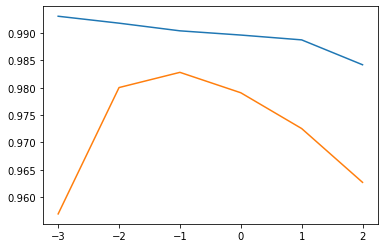

In [81]:
# 훈련시 발생하는 결정계수를 저장할 리스트
train_score = []

# 테스트시 발생하는 결정계수를 저장할 리스트
test_score = []

# 임의 alpha값(x축으로 설정) 설정(범위 설정)
alpha_list = [0.001, 0.01, 0.1 , 1, 10, 100]

# 훈련 및 테스트 결정계수 데이터 조회
for alpha in alpha_list :
    # 릿지모델
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    
# 시각화
plt.plot(np.log10(alpha_list), train_score) # blue
plt.plot(np.log10(alpha_list), test_score)  # orange

In [ ]:
'''
-1 > 10^-1 = 0.1

1이후부터는 훈련/테스트 모두 과소적합 (떨어지면 모두 과소적합)
'''

In [82]:
# 위 for문 안의 릿지모델
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386845


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, toleranc

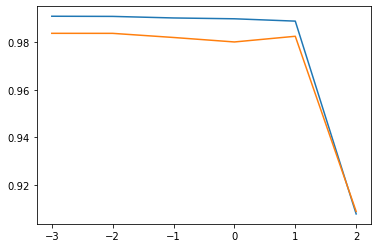

In [84]:
# 훈련시 발생하는 결정계수를 저장할 리스트
train_score = []

# 테스트시 발생하는 결정계수를 저장할 리스트
test_score = []

# 임의 alpha값(x축으로 설정) 설정(범위 설정)
alpha_list = [0.001, 0.01, 0.1 , 1, 10, 100]

# 훈련 및 테스트 결정계수 데이터 조회
for alpha in alpha_list :
    # 라쏘모델
    lasso = Lasso(alpha = alpha)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
    
# 시각화
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

In [ ]:
'''
1 이후는 급격하게 떨어지므로 과소적합

1 > 10^1 = 10
'''

In [86]:
# 위 for문 안의 라쏘모델
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
'''
훈련-테스트 결정계수 차는 라쏘모델이 차이가 적으나
훈련데이터가 우선 높은게 좋으므로 릿지모델을 택하는 것이 좋음
'''

## [문제]
- 테스트데이터 : length = 50, height = 16.49, width = 10.6
- 다중, 릿지, 라쏘 모두 예측해보기

In [128]:
import numpy as np
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

len(perch_weight)

56

In [142]:
## 훈련데이터와 테스트데이터 분리
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

# 객체생성(모델)
poly = PolynomialFeatures(degree = 5, include_bias=False)

# 훈련 :새롭게 만들 특성 조합
poly.fit(train_data)
poly.fit(test_data)

# 훈련/테스트데이터 변환
train_poly = poly.transform(train_data)
test_poly = poly.transform(test_data)

## 클래스(모델) 생성
lr = LinearRegression()

## 훈련
lr.fit(train_poly, train_target)

LinearRegression()

In [143]:
new = [[50,16.49,10.6]]
new_poly = poly.transform(new)
new_poly

array([[5.00000000e+01, 1.64900000e+01, 1.06000000e+01, 2.50000000e+03,
        8.24500000e+02, 5.30000000e+02, 2.71920100e+02, 1.74794000e+02,
        1.12360000e+02, 1.25000000e+05, 4.12250000e+04, 2.65000000e+04,
        1.35960050e+04, 8.73970000e+03, 5.61800000e+03, 4.48396245e+03,
        2.88235306e+03, 1.85281640e+03, 1.19101600e+03, 6.25000000e+06,
        2.06125000e+06, 1.32500000e+06, 6.79800250e+05, 4.36985000e+05,
        2.80900000e+05, 2.24198122e+05, 1.44117653e+05, 9.26408200e+04,
        5.95508000e+04, 7.39405408e+04, 4.75300020e+04, 3.05529424e+04,
        1.96398538e+04, 1.26247696e+04, 3.12500000e+08, 1.03062500e+08,
        6.62500000e+07, 3.39900125e+07, 2.18492500e+07, 1.40450000e+07,
        1.12099061e+07, 7.20588265e+06, 4.63204100e+06, 2.97754000e+06,
        3.69702704e+06, 2.37650010e+06, 1.52764712e+06, 9.81992692e+05,
        6.31238480e+05, 1.21927952e+06, 7.83769732e+05, 5.03818021e+05,
        3.23861190e+05, 2.08182451e+05, 1.33822558e+05]])

In [148]:
lr.predict(new_poly)

array([-562042.17613999])

In [149]:
# 클래스(모델) 생성
ss = StandardScaler()

# 스스로 표준점수 학습 및 생성
ss.fit(train_poly, train_target)

# 표준점수로 변환
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

new_scaled = ss.transform(new_poly)

# 평균 및 표준편차 확인
print(ss.mean_, ss.scale_)

[2.84452381e+01 8.04238095e+00 4.82047619e+00 8.85315000e+02
 2.53486881e+02 1.51959000e+02 7.29365000e+01 4.36999452e+01
 2.62868381e+01 2.97326070e+04 8.59817581e+03 5.15200651e+03
 2.49680043e+03 1.49567194e+03 8.99184494e+02 7.27945149e+02
 4.36019840e+02 2.62115117e+02 1.58141990e+02 1.05917983e+06
 3.08429517e+05 1.84644673e+05 9.01239554e+04 5.39478286e+04
 3.23998082e+04 2.64224658e+04 1.58167367e+04 9.49991053e+03
 5.72489005e+03 7.77162422e+03 4.65285399e+03 2.79521756e+03
 1.68494739e+03 1.01911272e+03 3.93876111e+07 1.15192532e+07
 6.88842737e+06 3.37865413e+06 2.02034307e+06 1.21184517e+06
 9.93774754e+05 5.94291271e+05 3.56516573e+05 2.14541208e+05
 2.93110780e+05 1.75313851e+05 1.05196649e+05 6.33244641e+04
 3.82394901e+04 8.66870097e+04 5.18625239e+04 3.11308026e+04
 1.87477065e+04 1.13270112e+04 6.86569419e+03] [8.72831196e+00 2.87343151e+00 1.74638123e+00 5.24782988e+02
 1.60836428e+02 9.64793789e+01 4.95165749e+01 2.97578956e+01
 1.81139412e+01 2.50155373e+04 7.49275

In [152]:
## 릿지모델 생성 및 학습
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)

ridge.predict(new_scaled)

array([2259.84739892])

In [153]:
## 라쏘모델 생성 및 학습
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)

lasso.predict(new_scaled)

array([2232.10145456])